In [1]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
for i, file in enumerate(Path('~/Indonesia_sm/samples_s1_aux/').glob('*.aux.pickle')):
    
    if i == 0:
        df = pd.read_pickle(file)
    else:
        df = pd.concat([df, pd.read_pickle(file)])
        
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf.to_file('~/Indonesia_sm/gdf_s1_aux.gpkg', driver = 'GPKG')

In [143]:
gdf = gpd.read_file('~/Indonesia_sm/gdf_s1_aux.gpkg')
X2 = gdf[bandlist]
y2 = gdf['GWL_rata']

In [131]:
bandlist = [
     'orbit_direction',
     'VV', 'VH', 'VVVH_ratio', 'angle', 'LIA', #'layover', 'shadow', 'no_data_mask', 
     'precipitation', 'prec_3', 'prec_7', 'prec_30', 
     #'gldas_mean', 'gldas_stddev',
     'sm_1', 'sm_3', 'sm_7', 'sm_30',
     #'elevation', 'aspect', 'slope', 
     'landcover',
     'kVV_mean', 'kVV_stdDev', 
     'kVV_p5', 'kVV_p95',
     'kVH_mean', 'kVH_stdDev', 
     'kVH_p5', 'kVH_p95', 
     'VV_mean', 'VV_stdDev', 
     'VV_p5', 'VV_p95', 
     'VH_mean', 'VH_stdDev', 
     'VH_p5', 'VH_p95'
    ]

In [132]:
station_list = ['BRG_627104_05', 'BRG_611209_01', 'BRG_611102_02', 'BRG_150710_02',
       'BRG_150709_02', 'BRG_621108_01', 'BRG_621103_04', 'BRG_621107_08',
       'BRG_610102_01', 'BRG_611203_02', 'BRG_627104_03', 'BRG_150710_03',
       'BRG_150710_01', 'BRG_150611_02', 'BRG_150613_01', 'BRG_610216_01',
       'BRG_621101_02', 'BRG_621107_05', 'BRG_620801_02', 'BRG_621103_06',
       'BRG_620309_02', 'BRG_150611_01', 'BRG_620208_01', 'BRG_611206_01',
       'BRG_621101_01', 'BRG_621107_06', 'BRG_621103_03', 'BRG_150706_01',
       'BRG_621107_02', 'BRG_621105_03', 'BRG_621103_01', 'BRG_610218_01',
       'BRG_150503_01', 'BRG_627104_02', 'BRG_621103_05', 'BRG_630611_01',
       'BRG_627104_04', 'BRG_627104_06', 'BRG_150604_01', 'BRG_150709_01',
       'BRG_621103_02', 'BRG_611203_01', 'BRG_621107_04', 'BRG_627104_01',
       'BRG_630411_01', 'BRG_611102_01', 'BRG_611201_01', 'BRG_150604_02',
       'BRG_620209_01', 'BRG_620309_01', 'BRG_610102_02', 'BRG_610117_01',
       'BRG_620801_01']

station_list2 = [
    'BRG_621103_05',
    'BRG_621103_04',
    'BRG_621103_01',
    'BRG_621103_02',
    'BRG_621103_06',
    'BRG_621103_03'
]

In [133]:
print(len(df))
df = gdf[gdf.station.isin(station_list)]
len(df)

230


1796

<AxesSubplot:ylabel='Density'>

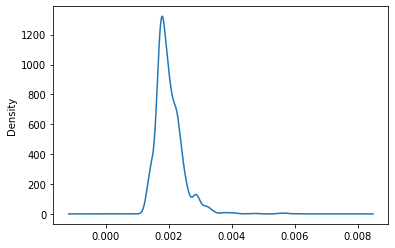

In [134]:
gdf.VH_stdDev.plot.density()

In [135]:
print(len(df))
df = df[df.kVH_stdDev >= 0.125]
print(len(df))

1796
1609


In [140]:
#X = StandardScaler().fit_transform(df[bandlist])
X = df[bandlist]
y = df['GWL_rata']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [141]:
regr = RandomForestRegressor(n_estimators=150, min_samples_leaf=3, random_state=42, oob_score=True, criterion='mse')
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

In [144]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))
y2_pred = regr.predict(X2)
r2_score(y2, y2_pred)

0.8648793751528616
0.558901028519825


0.04597978807677716

<AxesSubplot:xlabel='B'>

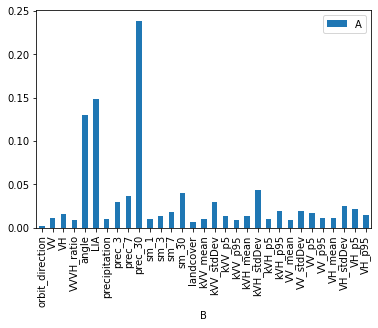

In [145]:
fdf = pd.DataFrame({'A': regr.feature_importances_, 'B': bandlist})
fdf.plot('B', 'A', kind='bar')